<a href="https://colab.research.google.com/github/alfredwisana/deep-learning/blob/main/week%203%3A%20CNN/data_100_percent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split

In [21]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


READ DATA

In [9]:
(train_data, test_data), ds_info = tfds.load(name="emnist/digits",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

Data Pre Processing

In [22]:
class_names = ds_info.features["label"].names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [23]:
tfds.as_dataframe(train_data.take(10), ds_info)

2024-03-02 11:42:23.102312: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


,image,label
0,,8
1,,8
2,,3
3,,8
4,,6
5,,8
6,,2
7,,5
8,,3
9,,4


2024-03-02 11:42:26.020414: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


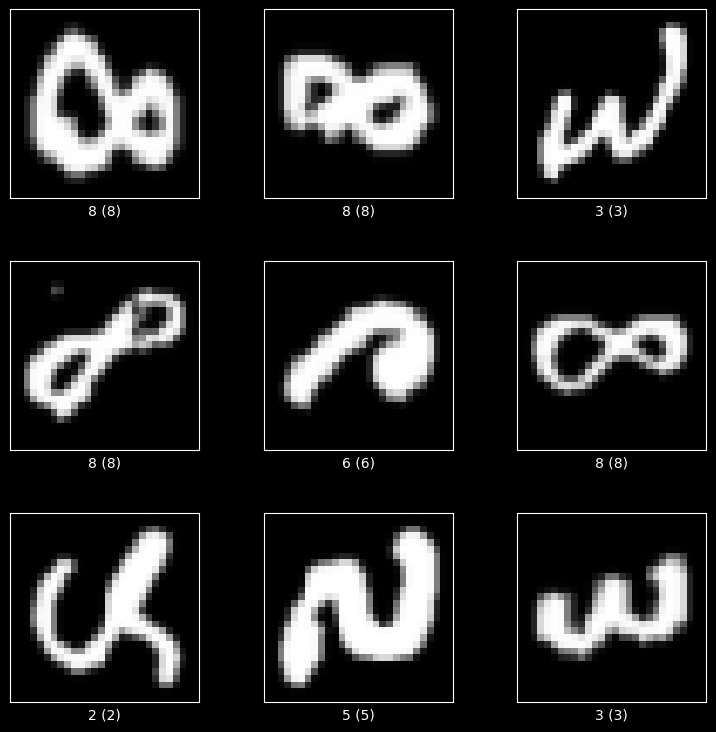

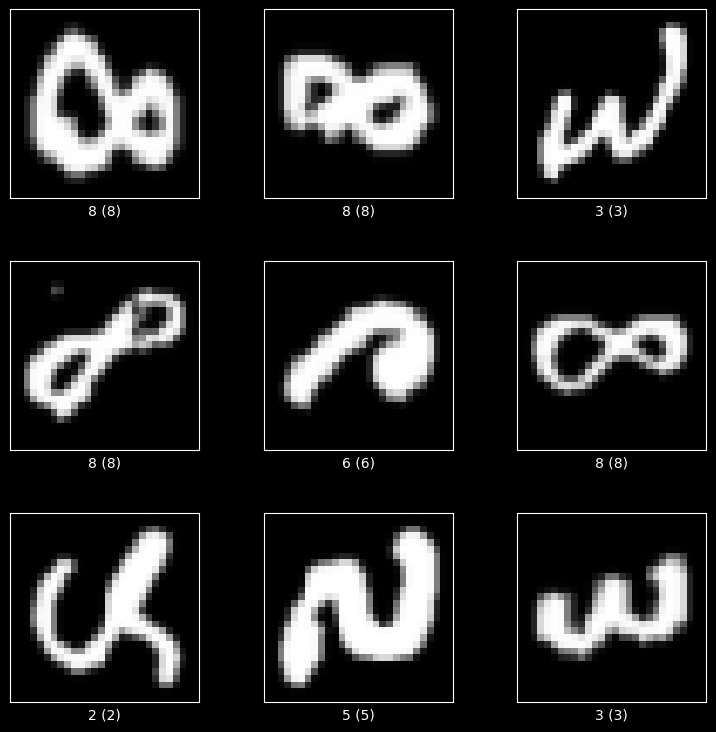

In [24]:
tfds.show_examples(train_data, ds_info)

In [25]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [26]:
def preprocess_image(image, label):
  # One Hot Encoding
  # 0 1 2 3 4 5 6 7 8 9
  # example 4
  # 0 0 0 0 1 0 0 0 0 0
  return tf.cast(image, tf.float32) / 255., tf.one_hot(label, depth=10)


In [27]:
mapped_train_data = train_data.map(preprocess_image).batch(32)
mapped_test_data = test_data.map(preprocess_image).batch(32)

Alexnet

In [30]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(227,227,1)),
        keras.layers.Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu'),
        keras.layers.MaxPool2D(pool_size=3, strides=(2,2)),
        keras.layers.Conv2D(256, kernel_size=(5,5), activation='relu'),
        keras.layers.MaxPool2D(pool_size=3, strides=(2,2)),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(384, kernel_size=(3,3), activation='relu'),
        keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 55, 55, 96)        11712     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 384)         885120    
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 384)        

In [31]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [32]:
history = model.fit(mapped_train_data.take(32), epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/home/dmds/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/dmds/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/dmds/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/dmds/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/dmds/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/dmds/.local/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 227, 227, 1), found shape=(None, 28, 28, 1)


LENET

In [33]:
model = keras.models.Sequential(
    [
      keras.layers.Input((28,28,1)),
      keras.layers.Conv2D(6, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Conv2D(16, kernel_size=(5,5), activation='sigmoid'),
      keras.layers.MaxPool2D(pool_size=2, strides=(2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(120, activation='sigmoid'),
      keras.layers.Dense(84, activation='sigmoid'),
      keras.layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [34]:
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [35]:
history = model.fit(mapped_train_data.take(32), epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 8ms/step - loss: 2.3390 - accuracy: 0.0996
Epoch 2/10
 8/32 [======>.......................] - ETA: 0s - loss: 2.3200 - accuracy: 0.1094

2024-03-02 11:49:53.063278: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 2.3207 - accuracy: 0.0908
Epoch 3/10
15/32 [=============>................] - ETA: 0s - loss: 2.3176 - accuracy: 0.0938

2024-03-02 11:49:53.390191: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 2.3127 - accuracy: 0.0967
Epoch 4/10
16/32 [==============>...............] - ETA: 0s - loss: 2.3150 - accuracy: 0.0898

2024-03-02 11:49:53.668183: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 2.3093 - accuracy: 0.0977
Epoch 5/10
17/32 [==============>...............] - ETA: 0s - loss: 2.3076 - accuracy: 0.0974

2024-03-02 11:49:53.931837: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 2.2993 - accuracy: 0.1182
Epoch 6/10
18/32 [===============>..............] - ETA: 0s - loss: 2.2830 - accuracy: 0.1354

2024-03-02 11:49:54.196970: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 2.2689 - accuracy: 0.1816
Epoch 7/10
16/32 [==============>...............] - ETA: 0s - loss: 2.2078 - accuracy: 0.3047

2024-03-02 11:49:54.442599: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 2.1697 - accuracy: 0.3623
Epoch 8/10
16/32 [==============>...............] - ETA: 0s - loss: 1.9933 - accuracy: 0.5195

2024-03-02 11:49:54.710232: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 1.9204 - accuracy: 0.5107
Epoch 9/10
17/32 [==============>...............] - ETA: 0s - loss: 1.6345 - accuracy: 0.5974

2024-03-02 11:49:54.967368: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 1.5648 - accuracy: 0.6064
Epoch 10/10
17/32 [==============>...............] - ETA: 0s - loss: 1.3030 - accuracy: 0.6710

2024-03-02 11:49:55.214764: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 0s 7ms/step - loss: 1.2515 - accuracy: 0.6982


2024-03-02 11:49:55.463944: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


CUSTOM MODEL